<a href="https://colab.research.google.com/github/ingridfigenskau/clustering/blob/main/Fraud_Prediction_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4/bank_transactions_data_2.csv')
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
TransactionDate = pd.to_datetime(df['TransactionDate'])
df['TransactionDate'] = TransactionDate
PreviousTransactionDate = pd.to_datetime(df['PreviousTransactionDate'])
df['PreviousTransactionDate'] = PreviousTransactionDate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [6]:
df.isnull().sum

<bound method DataFrame.sum of       TransactionID  AccountID  TransactionAmount  TransactionDate  \
0             False      False              False            False   
1             False      False              False            False   
2             False      False              False            False   
3             False      False              False            False   
4             False      False              False            False   
...             ...        ...                ...              ...   
2507          False      False              False            False   
2508          False      False              False            False   
2509          False      False              False            False   
2510          False      False              False            False   
2511          False      False              False            False   

      TransactionType  Location  DeviceID  IP Address  MerchantID  Channel  \
0               False     False     False       False       False    False   
1               False     False     False       False       False    False   
2               False     False     False       False       False    False   
3               False     False     False       False       False    False   
4               False     False     False       False       False    False   
...               ...       ...       ...         ...         ...      ...   
2507            False     False     False       False       False    False   
2508            False     False     False       False       False    False   
2509            False     False     False       False       False    False   
2510            False     False     False       False       False    False   
2511            False     False     False       False       False    False   

      CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0           False               False                False          False   
1           False               False                False          False   
2           False               False                False          False   
3           False               False                False          False   
4           False               False                False          False   
...           ...                 ...                  ...            ...   
2507        False               False                False          False   
2508        False               False                False          False   
2509        False               False                False          False   
2510        False               False                False          False   
2511        False               False                False          False   

      AccountBalance  PreviousTransactionDate  
0              False                    False  
1              False                    False  
2              False                    False  
3              False                    False  
4              False                    False  
...              ...                      ...  
2507           False                    False  
2508           False                    False  
2509           False                    False  
2510           False                    False  
2511           False                    False  

[2512 rows x 16 columns]>

In [7]:
stat_df = df.describe()
print(stat_df['AccountBalance']['std'])

stat_df

3900.9424987311


,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


In [8]:
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[0, 27, 45, 59, 100], labels=['18-27', '28-45', '46-59', '60+'])

In [9]:
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.day

df[['TransactionHour','TransactionDate','TransactionDay']]

,TransactionHour,TransactionDate,TransactionDay
0,16,2023-04-11 16:29:14,11
1,16,2023-06-27 16:44:19,27
2,18,2023-07-10 18:16:08,10
3,16,2023-05-05 16:32:11,5
4,17,2023-10-16 17:51:24,16
...,...,...,...
2507,17,2023-04-26 17:09:36,26
2508,17,2023-03-22 17:36:48,22
2509,17,2023-08-21 17:08:50,21
2510,16,2023-02-24 16:24:46,24


In [10]:
df['AccountID']= df['AccountID'].str.lstrip('AC').astype(float)
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionHour,TransactionDay
0,TX000001,128.0,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,60+,16,11
1,TX000002,455.0,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,60+,16,27
2,TX000003,19.0,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,18-27,18,10
3,TX000004,70.0,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,18-27,16,5
4,TX000005,411.0,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,18-27,17,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,297.0,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,28-45,17,26
2508,TX002509,322.0,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,46-59,17,22
2509,TX002510,95.0,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,46-59,17,21
2510,TX002511,118.0,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,18-27,16,24


In [11]:
features_to_graph = ['AccountID','TransactionAmount','TransactionDate','TransactionType','Channel','CustomerAge','CustomerOccupation','TransactionDuration','LoginAttempts','AccountBalance','PreviousTransactionDate','AgeGroup','TransactionHour','TransactionDay']
df_feat = df[features_to_graph]
df_feat.head()

,AccountID,TransactionAmount,TransactionDate,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionHour,TransactionDay
0,128.0,14.09,2023-04-11 16:29:14,Debit,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,60+,16,11
1,455.0,376.24,2023-06-27 16:44:19,Debit,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,60+,16,27
2,19.0,126.29,2023-07-10 18:16:08,Debit,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,18-27,18,10
3,70.0,184.50,2023-05-05 16:32:11,Debit,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,18-27,16,5
4,411.0,13.45,2023-10-16 17:51:24,Credit,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,18-27,17,16


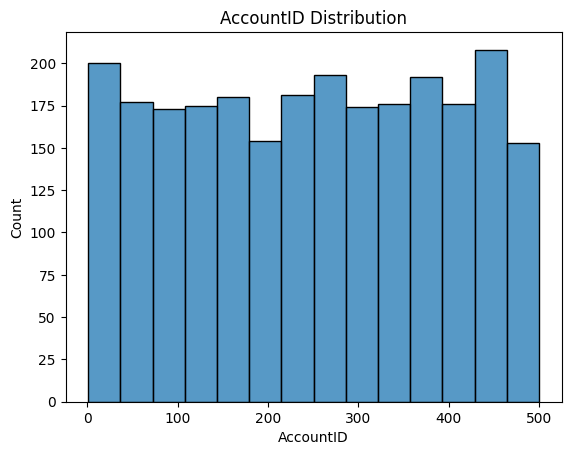

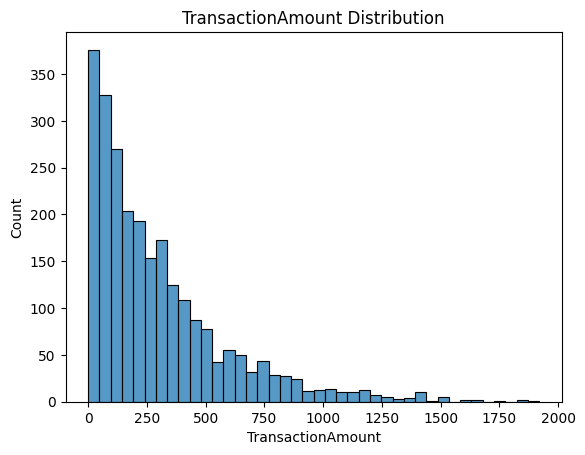

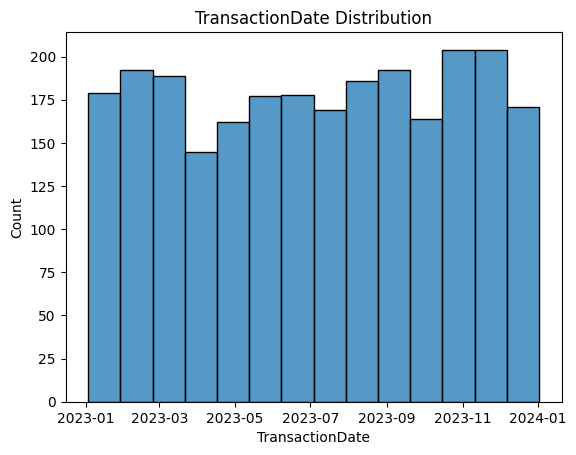

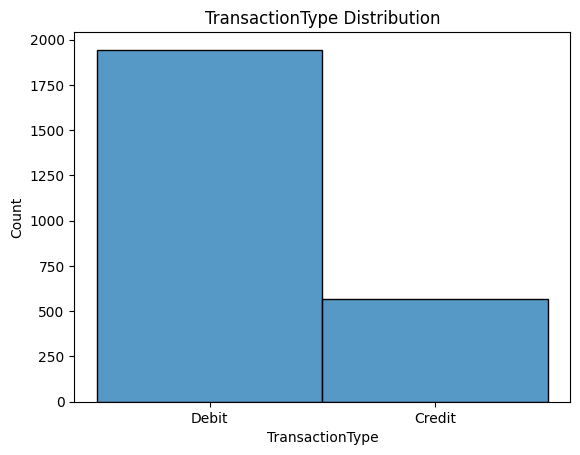

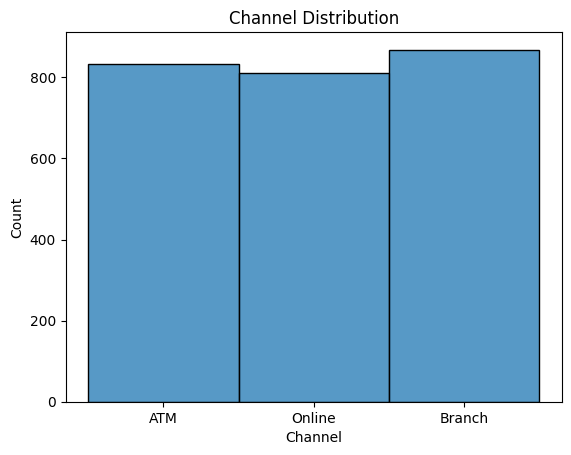

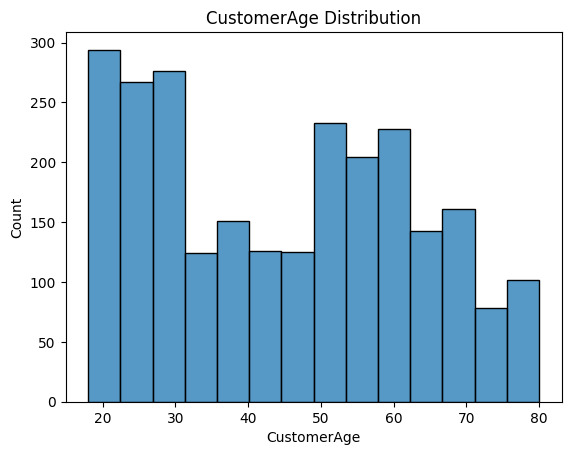

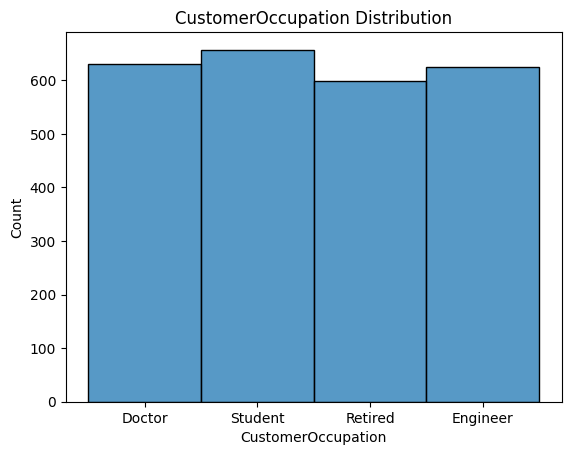

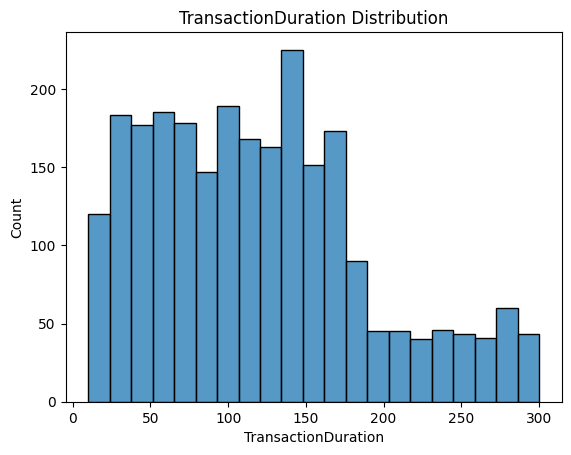

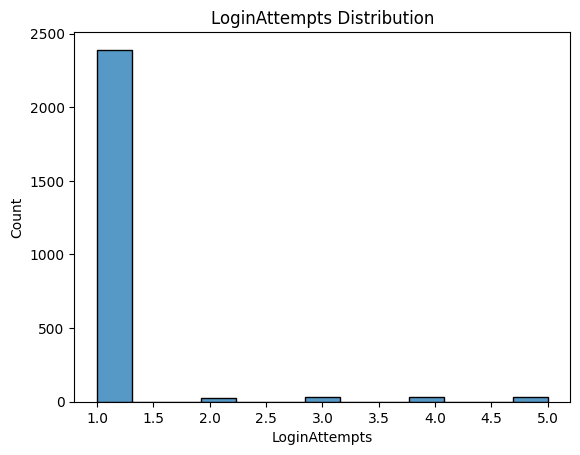

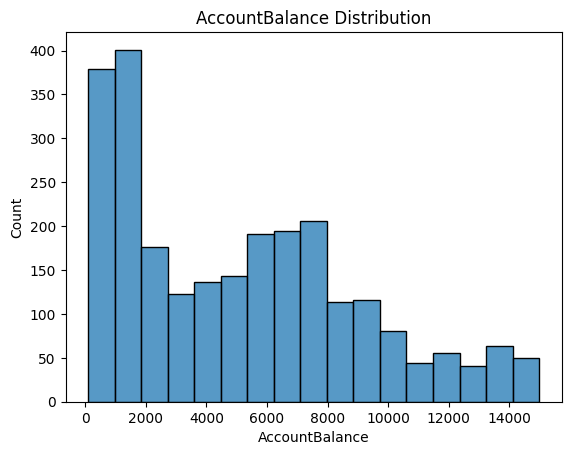

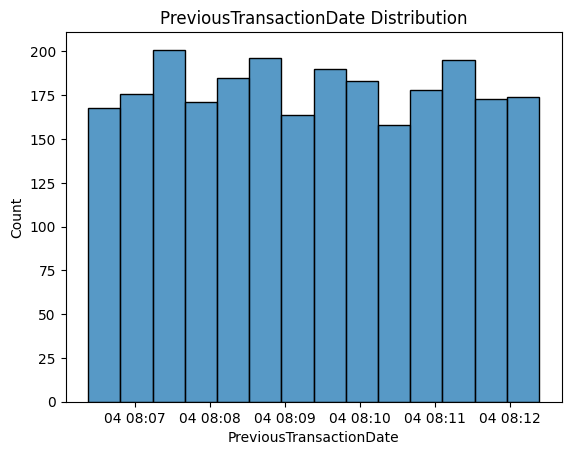

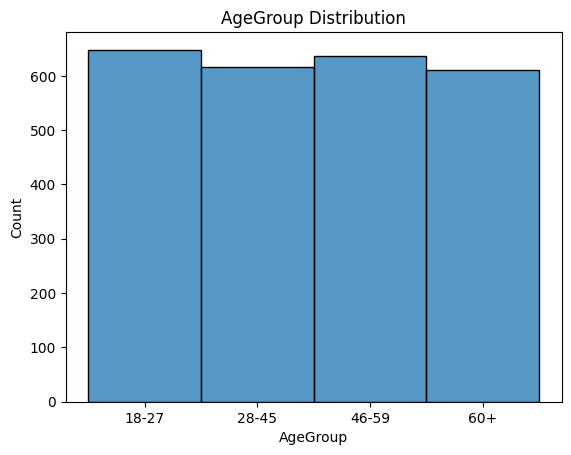

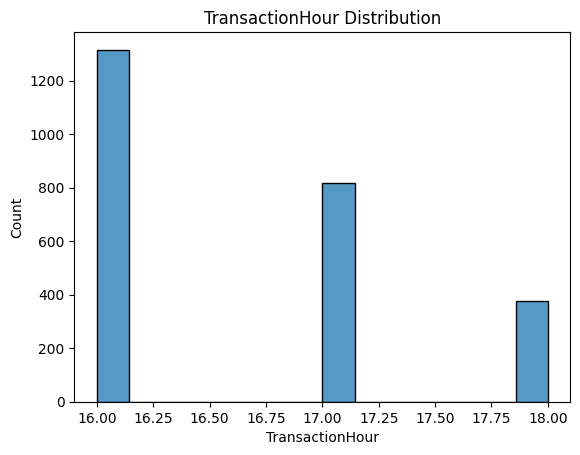

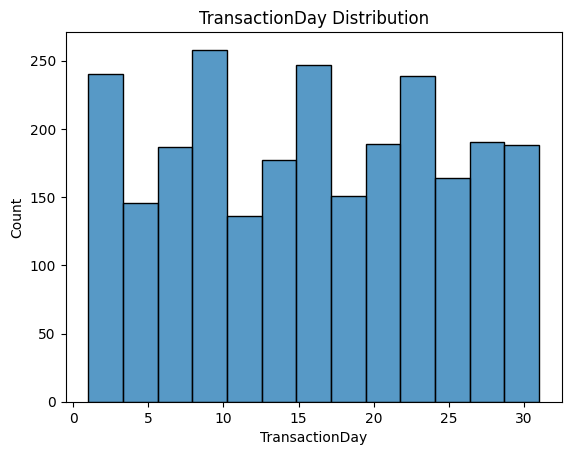

In [12]:
for feature in df_feat:
  sns.histplot(df_feat[feature])
  plt.title(f'{feature} Distribution')
  plt.show()


In [13]:
df['CustomerOccupation'].value_counts()

,count
CustomerOccupation,
Student,657
Doctor,631
Engineer,625
Retired,599


<ipython-input-14-83413d60fd2c>:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(data=df, x='CustomerOccupation', y='TransactionAmount', hue = 'CustomerOccupation', palette=colors)


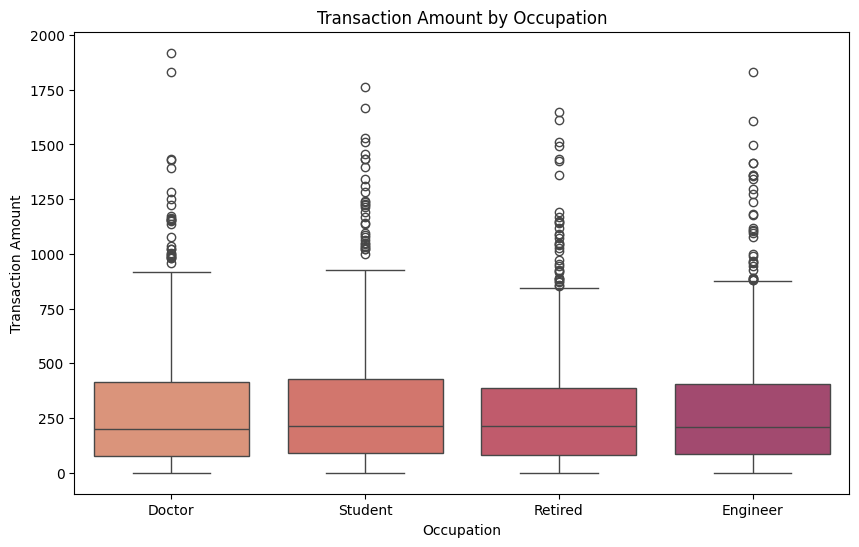

In [14]:
# Regardless of Occupation the spread of their Transaction Amounts are very similar - The Median Transaction Amount is a little under 250 for each Occupation
colors = sns.color_palette("flare")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CustomerOccupation', y='TransactionAmount', hue = 'CustomerOccupation', palette=colors)

plt.title("Transaction Amount by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Transaction Amount")
plt.show()

In [15]:
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = ['TransactionType', 'Channel','CustomerOccupation']
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_feat, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.drop(columns=['TransactionType_Credit','Channel_ATM','CustomerOccupation_Doctor','AgeGroup','PreviousTransactionDate','TransactionDate'], axis = 1, inplace = True)
df_encoded
#TransactionType_Debit = 1 when Debit and 0 when Credit
#Channel_Branch =1 then Branch if Channel_Online =1 then Online, if both = 0 then ATM
#CustomerOccupation_Engineer = 1 then Engineer if	CustomerOccupation_Retired = 1 then Retired	CustomerOccupation_Student = 1 then Student, if all 3 are 0 then Doctor
#Drop AgeGroup, TransactionDate, and PreviousTransactionDate because not numerical

,AccountID,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,128.0,14.09,70,81,1,5112.21,16,11,1.0,0.0,0.0,0.0,0.0,0.0
1,455.0,376.24,68,141,1,13758.91,16,27,1.0,0.0,0.0,0.0,0.0,0.0
2,19.0,126.29,19,56,1,1122.35,18,10,1.0,0.0,1.0,0.0,0.0,1.0
3,70.0,184.50,26,25,1,8569.06,16,5,1.0,0.0,1.0,0.0,0.0,1.0
4,411.0,13.45,26,198,1,7429.40,17,16,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,297.0,856.21,33,109,1,12690.79,17,26,0.0,1.0,0.0,0.0,0.0,0.0
2508,322.0,251.54,48,177,1,254.75,17,22,1.0,1.0,0.0,0.0,0.0,0.0
2509,95.0,28.63,56,146,1,3382.91,17,21,1.0,1.0,0.0,0.0,1.0,0.0
2510,118.0,185.97,23,19,1,1776.91,16,24,1.0,0.0,1.0,0.0,0.0,1.0


In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AccountID                    2512 non-null   float64
 1   TransactionAmount            2512 non-null   float64
 2   CustomerAge                  2512 non-null   int64  
 3   TransactionDuration          2512 non-null   int64  
 4   LoginAttempts                2512 non-null   int64  
 5   AccountBalance               2512 non-null   float64
 6   TransactionHour              2512 non-null   int32  
 7   TransactionDay               2512 non-null   int32  
 8   TransactionType_Debit        2512 non-null   float64
 9   Channel_Branch               2512 non-null   float64
 10  Channel_Online               2512 non-null   float64
 11  CustomerOccupation_Engineer  2512 non-null   float64
 12  CustomerOccupation_Retired   2512 non-null   float64
 13  CustomerOccupation

In [17]:
numerical_features = df_encoded.select_dtypes(include=np.number).columns
numerical_data = df_encoded[numerical_features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=df_encoded.index)
scaled_df

,AccountID,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-0.843122,-0.971275,1.423718,-0.552443,-0.206794,-0.000537,-0.856729,-0.551082,0.540538,-0.726623,-0.690491,-0.575512,-0.559572,-0.595128
1,1.416551,0.269440,1.311287,0.305314,-0.206794,2.216472,-0.856729,1.275496,0.540538,-0.726623,-0.690491,-0.575512,-0.559572,-0.595128
2,-1.596346,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534,1.879574,-0.665243,0.540538,-0.726623,1.448244,-0.575512,-0.559572,1.680309
3,-1.243920,-0.387456,-1.049768,-1.353017,-0.206794,0.885797,-0.856729,-1.236049,0.540538,-0.726623,1.448244,-0.575512,-0.559572,1.680309
4,1.112497,-0.973468,-1.049768,1.120184,-0.206794,0.593589,0.511423,0.019724,-1.850010,-0.726623,1.448244,-0.575512,-0.559572,1.680309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,0.324722,1.913802,-0.656259,-0.152156,-0.206794,1.942606,0.511423,1.161335,-1.850010,1.376230,-0.690491,-0.575512,-0.559572,-0.595128
2508,0.497479,-0.157779,0.186975,0.819969,-0.206794,-1.245986,0.511423,0.704690,0.540538,1.376230,-0.690491,-0.575512,-0.559572,-0.595128
2509,-1.071162,-0.921462,0.636700,0.376794,-0.206794,-0.443928,0.511423,0.590529,0.540538,1.376230,-0.690491,-0.575512,1.787080,-0.595128
2510,-0.912225,-0.382420,-1.218415,-1.438793,-0.206794,-0.855705,-0.856729,0.933013,0.540538,-0.726623,1.448244,-0.575512,-0.559572,1.680309


In [18]:
#Use pca to create only 2 variables with the most variance to use for kmeans
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

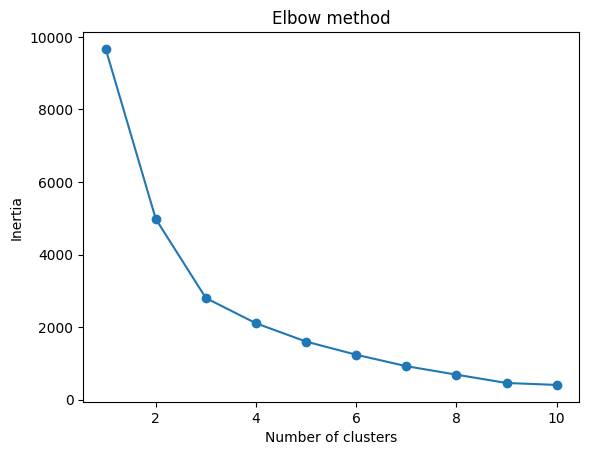

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
wcss
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [20]:
#Using elbow method, I choose 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)
kmeans_labels = kmeans.fit_predict(pca_data)

In [21]:
# Euclidean Distance Caculator
def dist_from_center(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

distances = dist_from_center(pca_data,kmeans.cluster_centers_[kmeans_labels])
distances_series = pd.Series(distances)
distances_series.describe()
max_threshold = distances_series.quantile(0.95)


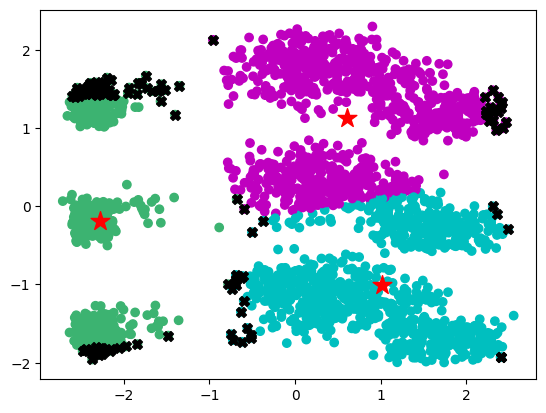

In [22]:
labels = kmeans.labels_

#Add the labels to the original dataframe
df_encoded['cluster'] = labels
LABEL_COLOR_MAP = {0 : 'c',
                   1 : 'm',
                   2 : 'mediumseagreen'}

label_color = [LABEL_COLOR_MAP[l] for l in labels]


#Plot the clusters,centroids,and potential fraudulent charges
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=label_color)
dist_from_center = np.linalg.norm(pca_data - kmeans.cluster_centers_[kmeans_labels])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids',marker='*')

plt.scatter(pca_data[distances > max_threshold, 0], pca_data[distances > max_threshold, 1], color='black', s=50, label='Potential Frauds', marker='X')

plt.show()

In [23]:
potential_fraud = distances > max_threshold
df['Fraud_notice'] = potential_fraud
df[df['Fraud_notice']==True]


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionHour,TransactionDay,Fraud_notice
3,TX000004,70.0,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,18-27,16,5,True
4,TX000005,411.0,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,18-27,17,16,True
11,TX000012,459.0,190.02,2023-02-06 17:30:00,Debit,Memphis,D000589,116.175.11.222,M030,Online,21,Student,173,1,1528.81,2024-11-04 08:07:12,18-27,17,6,True
19,TX000020,285.0,71.48,2023-06-08 18:18:50,Credit,Columbus,D000039,120.170.93.69,M039,Online,18,Student,169,1,6568.59,2024-11-04 08:09:20,18-27,18,8,True
23,TX000024,453.0,345.84,2023-05-02 18:25:46,Debit,Fort Worth,D000162,191.82.103.198,M083,Online,22,Student,142,3,1402.50,2024-11-04 08:07:04,18-27,18,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,TX002408,194.0,352.03,2023-06-08 16:49:20,Credit,Phoenix,D000599,13.30.106.126,M001,Online,27,Student,219,1,4846.68,2024-11-04 08:11:14,18-27,16,8,True
2438,TX002439,432.0,537.71,2023-04-04 16:07:04,Credit,Mesa,D000073,146.69.70.214,M078,Online,19,Student,175,1,1806.08,2024-11-04 08:07:22,18-27,16,4,True
2447,TX002448,140.0,163.22,2023-04-06 18:06:12,Debit,Miami,D000193,186.54.68.246,M029,Online,26,Student,217,1,1788.27,2024-11-04 08:07:56,18-27,18,6,True
2452,TX002453,242.0,66.76,2023-04-24 18:29:26,Credit,Austin,D000670,97.106.5.76,M004,Branch,36,Doctor,44,1,184.72,2024-11-04 08:10:58,28-45,18,24,True


In [24]:
#Could mean that the data used is not accurate, not sure how the AccountID can be the same for someone with a different CustomerAge and CustomerOccupation
df[df['AccountID']==70.0]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,TransactionHour,TransactionDay,Fraud_notice
3,TX000004,70.0,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,18-27,16,5,True
218,TX000219,70.0,890.24,2023-07-07 18:03:43,Credit,Las Vegas,D000223,28.149.72.129,M029,Online,33,Engineer,161,1,5140.93,2024-11-04 08:07:32,28-45,18,7,False
442,TX000443,70.0,293.97,2023-11-13 17:34:15,Debit,Phoenix,D000444,56.89.80.133,M047,Branch,68,Retired,153,1,7371.85,2024-11-04 08:08:57,60+,17,13,False
1003,TX001004,70.0,156.58,2023-09-18 16:03:10,Debit,Portland,D000079,48.31.196.24,M083,Branch,24,Student,160,1,8981.61,2024-11-04 08:09:39,18-27,16,18,False
1254,TX001255,70.0,142.19,2023-06-15 18:28:50,Debit,Houston,D000416,85.191.79.161,M005,Branch,18,Student,27,4,524.46,2024-11-04 08:09:44,18-27,18,15,False
1296,TX001297,70.0,93.22,2023-04-07 17:11:35,Debit,Charlotte,D000140,70.130.169.235,M030,Online,52,Retired,52,1,1014.63,2024-11-04 08:09:41,46-59,17,7,False
1931,TX001932,70.0,31.19,2023-04-25 16:23:59,Debit,Charlotte,D000410,93.160.83.196,M023,ATM,52,Engineer,74,1,5545.96,2024-11-04 08:09:33,46-59,16,25,False
2480,TX002481,70.0,99.98,2023-03-30 16:52:05,Credit,Washington,D000269,22.196.202.183,M093,Online,73,Retired,152,1,3037.97,2024-11-04 08:07:59,60+,16,30,False


In [25]:
Z = hierarchy.linkage(df_encoded, method='average')
Z

array([[4.77000000e+02, 1.05300000e+03, 1.97626542e+01, 2.00000000e+00],
       [1.38500000e+03, 1.95300000e+03, 1.98246765e+01, 2.00000000e+00],
       [1.35500000e+03, 2.46300000e+03, 2.26255983e+01, 2.00000000e+00],
       ...,
       [5.01600000e+03, 5.01800000e+03, 3.34501771e+03, 1.08200000e+03],
       [5.01900000e+03, 5.02000000e+03, 5.89376923e+03, 2.36200000e+03],
       [5.01200000e+03, 5.02100000e+03, 9.18418863e+03, 2.51200000e+03]])

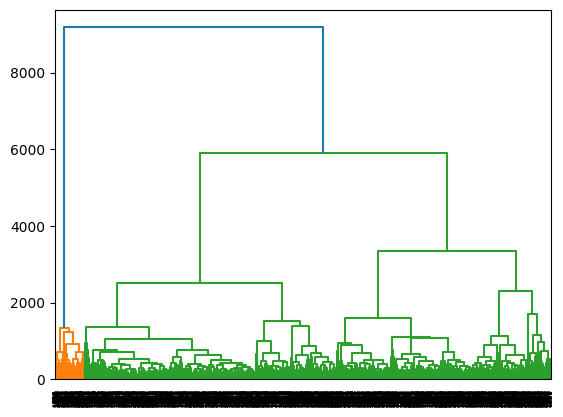

In [26]:
hierarchy.dendrogram(Z)
plt.show()